In [86]:
import pandas as pd 

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/test.csv', na_values=['', 'NULL', 'NaN'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

### Deal with Null values

In [89]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [90]:
# Categorical data for those 'NA' has real meanings
na_columns_with_meaning = {
    'Alley': 'NoAlleyAccess',
    'MasVnrType' : 'NoMas',
    'BsmtQual': 'NoBasement',
    'BsmtCond': 'NoBasement',
    'BsmtExposure': 'NoBasement',
    'BsmtFinType1': 'NoBasement',
    'BsmtFinType2': 'NoBasement',
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'PoolQC': 'NoPool',
    'Fence': 'NoFence',
    'MiscFeature': 'None'
}

for column, fill_value in na_columns_with_meaning.items():
    df[column] = df[column].fillna(fill_value)

# fill in numberical missing value with average value
numeric_columns_with_nulls = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for column in numeric_columns_with_nulls:
    df[column] = df[column].fillna(df[column].median())

# fill in with the most often value for column 'Electrical'
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# check missing value again
missing_values_2 = df.isnull().sum()
missing_values_2[missing_values > 0]




LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Feature Engineering

In [91]:
# Onehot encode categorical data
df_encoded = pd.get_dummies(df, drop_first=True)


In [92]:
# split data 
from sklearn.model_selection import train_test_split

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear models

In [93]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# create models
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Bayesian Ridge": BayesianRidge()
}

# create an empty storage for the performance 

model_performance ={}

# train model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    mse =mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mse)
    
    model_performance[name] = {'R2 Score:': R2, 'RMSE:':RMSE }
    
model_performance_df = pd.DataFrame(model_performance).T
model_performance_df


C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.866e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.217e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


,R2 Score:,RMSE:
Linear Regression,0.101632,83010.701869
Elastic Net,0.836871,35373.075966
Lasso,0.836303,35434.585961
Ridge,0.878720,30500.092879
Bayesian Ridge,0.877978,30593.312332


### Check feature's significants

In [94]:
# using Ridge model to check features' coefficient
ridge_model = models['Ridge']
# get features' name
feature_names = X_train.columns


ridge_coefficients = ridge_model.coef_
ridge_features_coefficients = pd.DataFrame(list(zip(feature_names, ridge_coefficients)), columns=['Feature', 'Coefficient'])
ridge_features_sorted = ridge_features_coefficients.sort_values(by='Coefficient', ascending=False, key=abs)

# select top 20 features
ridge_features_sorted.head(20)



,Feature,Coefficient
237,PoolQC_Gd,-140233.519230
92,Condition2_PosN,-94630.993512
118,RoofMatl_WdShngl,70241.143827
238,PoolQC_NoPool,49443.954992
112,RoofMatl_CompShg,43124.913767
78,Neighborhood_StoneBr,41200.733399
236,PoolQC_Fa,-35296.321452
139,Exterior2nd_ImStucc,35058.277568
71,Neighborhood_NoRidge,31408.997239
117,RoofMatl_WdShake,30954.348539


# Predict on Test data

In [95]:
missing_values_test = df_test.isnull().sum()
missing_values_test[missing_values > 0]

LotFrontage      227
Alley           1352
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [96]:
# Categorical data for those 'NA' has real meanings
na_columns_with_meaning = {
    'Alley': 'NoAlleyAccess',
    'MasVnrType' : 'NoMas',
    'BsmtQual': 'NoBasement',
    'BsmtCond': 'NoBasement',
    'BsmtExposure': 'NoBasement',
    'BsmtFinType1': 'NoBasement',
    'BsmtFinType2': 'NoBasement',
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'PoolQC': 'NoPool',
    'Fence': 'NoFence',
    'MiscFeature': 'None'
}

for column, fill_value in na_columns_with_meaning.items():
    df_test[column] = df_test[column].fillna(fill_value)

# fill in numberical missing value with average value
numeric_columns_with_nulls = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for column in numeric_columns_with_nulls:
    df_test[column] = df_test[column].fillna(df_test[column].median())

# fill in with the most often value for column 'Electrical'
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

# check missing value again
missing_values_2 = df_test.isnull().sum()
missing_values_2[missing_values > 0]




LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [97]:
# Onehot encode categorical data
df_test_encoded = pd.get_dummies(df_test, drop_first=True)


In [98]:
# split data 
X_test = df_test_encoded


In [99]:
ridge_model = models['Ridge']
y_test_pred = ridge_model.predict(X)

predictions = pd.DataFrame(y_test_pred, columns=['PredictedSalesPrice'])

predictions


,PredictedSalesPrice
0,207643.392509
1,204861.928806
2,213066.705192
3,173031.373256
4,298810.869730
...,...
1455,173243.493565
1456,205661.477288
1457,255090.719825
1458,145258.442140


# Non-lineaer models

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# split data 
from sklearn.model_selection import train_test_split

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
non_linear_models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Randome Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting' : GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# store performance
non_linear_model_performance ={}

# create models
for name, model in non_linear_models.items():
    model.fit(X_train, y_train)
    y_pred_nonlinear = model.predict(X_test)
    R2_nl = r2_score(y_test, y_pred_nonlinear)
    MSE_nl = mean_squared_error(y_test, y_pred_nonlinear)
    RMSE_nl = np.sqrt(MSE_nl)
    
    non_linear_model_performance[name] = {'R2 Score_nl' :R2_nl,'RMSE_nl' : RMSE_nl}

# convert performance to dataset
non_linear_performance = pd.DataFrame(non_linear_model_performance).T
non_linear_performance

,R2 Score_nl,RMSE_nl
Decision Tree,0.770433,41962.543672
Randome Forest,0.886965,29445.164636
Gradient Boosting,0.900258,27659.604111


## feature significants

### Individual Conditional Expectation(ICE) Plot

In [103]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay



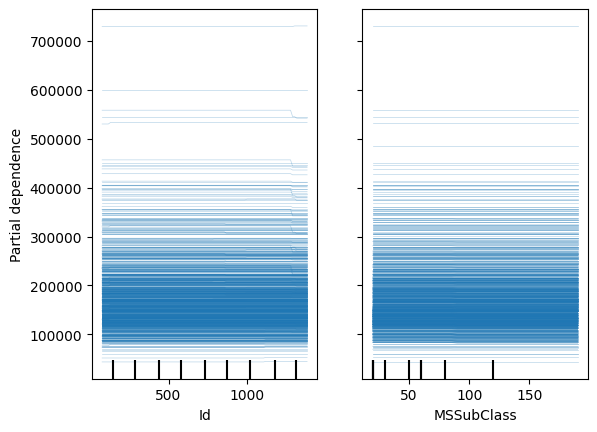

In [104]:
# plot ICE
features = [0, 1] 
PartialDependenceDisplay.from_estimator(model, X_train, features, kind='individual', feature_names=feature_names)
plt.show()

### Feature Importance 

In [105]:
from sklearn.inspection import permutation_importance

Permutation method

TypeError: 'str' object is not callable

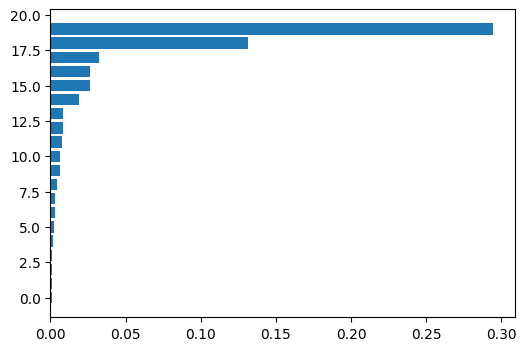

In [109]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_index = result.importances_mean.argsort()[-20:]

# 绘制条形图
plt.figure(figsize=(6, len(sorted_index) * 0.2))
plt.barh(range(len(sorted_index)), result.importances_mean[sorted_index], align='center')
plt.yticks(range(len(sorted_index)), [feature_names[i] for i in sorted_index])
plt.xlabel('Permutation Importance')
plt.tight_layout()
plt.show()

Decision tree method

In [ ]:
dt_model = non_linear_models['Decision Tree']
importance = dt_model.feature_importances_

feature_importances = pd.DataFrame(zip(feature_names, importance), columns=['Feature','Importance'])
feature_importances_sorted = feature_importances.sort_values(by= 'Importance', ascending=True).tail(20)
feature_importances_sorted

,Feature,Importance
42,Alley_NoAlleyAccess,0.003934
173,BsmtExposure_No,0.004827
29,OpenPorchSF,0.005070
24,Fireplaces,0.005288
3,LotArea,0.005791
196,CentralAir_Y,0.007036
219,GarageType_Detchd,0.008399
5,OverallCond,0.008438
26,GarageCars,0.008460
35,MoSold,0.009031


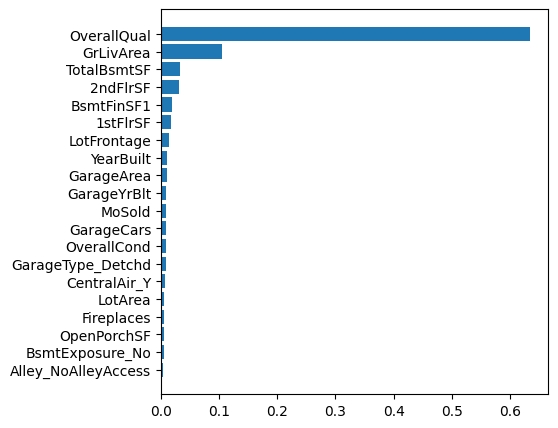

In [107]:
# plot 

plt.figure(figsize=(5,5))
plt.barh(feature_importances_sorted['Feature'],feature_importances_sorted['Importance'],align='center')
plt.title  = ('Decision Tree top 20 Feature Importance')
plt.xlabel = ('Feature Names')
#plt.tight_layout
plt.show()

### Shaply